## Clasificación de Digitos a la Antigüa

Se importan las librerias a usar para este ejercicio:

In [121]:
from sklearn.datasets import load_digits ## Data Set
from math import log10 # Funcion log base 10
import pylab as pl # Conjunto de librerias (MatLab)
import numpy as np # Soporte de vectores y matrices.

[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
3


<Figure size 432x288 with 0 Axes>

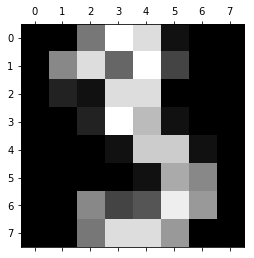

In [122]:

digits = load_digits()
pl.gray()
pl.matshow(digits.images[3]) #Muestra la matriz en escala de grises
print(digits.images[3]) #Muestra la matriz de valores
print(digits.target[3]) # Muestra el label previamente clasificado.

Se crea una plantilla de un 3 (Tres) como base para la evaluación de las imágenes del dataset.

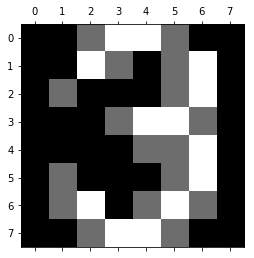

In [123]:
# Plantilla: 
b = 2.0
m = 8.0
a = 16.0
tresito = [[b,b,m,a,a,m,b,b],
           [b,b,a,m,b,m,a,b],
           [b,m,b,b,b,m,a,b],
           [b,b,b,m,a,a,m,b],
           [b,b,b,b,m,m,a,b],
           [b,m,b,b,b,m,a,b],
           [b,m,a,b,m,a,m,b],
           [b,b,m,a,a,m,b,b]]

pl.matshow(tresito)

### Estrategia:

La estrategia que se usa es la siguiente:

1. Se disminuye a dimensión-1 cada imágen del dataset y la plantilla.
2. Se suma 1 a cada valor de cada imagen, para eliminar 0´s.
3. Se normalizan los valores de cada lista (imagen)  
    - Se encuentra el valor maximo para cada lista.  
    - Se divide cada lista por ese valor maximo.  
4. Se define la función de score (Evaluación): La cual compara el valor de cada pixel de la imagen con el de la  
    plantilla y si la diferencia abosluta es menor que el delta, suma el log10(p), donde p es el valor del pixel de la imagen,  
    en caso contrario suma el log10(p/2).
5. Se define un valor de "Aceptación" como:  
    $$accept = \frac{[sum_{n=1}^{numImages} score(img[n])]}{numImages}$$
6. Se construye un diccionario para almacenar el número de 3´s correctamente clasificados y los correctamente clasificados como
    no-3´s.
7. Se calcula la precisión del modelo: 
    $$CP: Correctamente Positivos$$
    $$CN: Correctamente Negativos$$
    $$Accu = \frac{CP + CN}{numImages}$$
    


In [124]:
# función para normalizar imagenes.
def norm(image):
    lenImage = len(image)
    maxi = max(image)
    for i in range(0, lenImage):
        image[i] = image[i]/maxi        

In [125]:
# Se normaliza el dataset
numImages = len(digits.images)
img = digits.images.reshape((numImages, -1))
for i in range(0, numImages):
    lenImg = len(img[i])
    for j in range(0, lenImg):
        img[i][j] += 1
    norm(img[i])

In [126]:
aux = np.array(tresito)
tresi = aux.flatten()
norm(tresi)
print(tresi)

[0.125 0.125 0.5   1.    1.    0.5   0.125 0.125 0.125 0.125 1.    0.5
 0.125 0.5   1.    0.125 0.125 0.5   0.125 0.125 0.125 0.5   1.    0.125
 0.125 0.125 0.125 0.5   1.    1.    0.5   0.125 0.125 0.125 0.125 0.125
 0.5   0.5   1.    0.125 0.125 0.5   0.125 0.125 0.125 0.5   1.    0.125
 0.125 0.5   1.    0.125 0.5   1.    0.5   0.125 0.125 0.125 0.5   1.
 1.    0.5   0.125 0.125]


A mayor diferencia de probabilidades menos "score" va a tener.

In [127]:
# Función de calculo del score de cada imágen.
def getScore(image1, image2, delta):
    score = 0.0
    imglen = len(image1)
    for i in range(0,imglen):
        if abs(image1[i]-image2[i]) <= delta:
            score += log10(image1[i])
        else:
            score += log10(image1[i]/2.0)
    return score

In [128]:
## Se calcula el valor de acceptación
accept = 0.0;
for i in range(0, numImages):
   accept +=  getScore(img[i], tresi, delta)
accept /= numImages;
print(accept)

-56.04386607522759


In [129]:
# Se realiza la clasificación de imagenes
delta = 0.25
clasi = {"0": 0, "1": 0}
for i in range(0, numImages):
    if getScore(img[i], tresi, delta) > accept:
        if  digits.target[i]==3:
            clasi["1"]+=1
    elif digits.target[i]!=3:
        clasi["0"]+=1

print("Correctamente negativos:", clasi["0"])
print("Correctamente positivos:", clasi["1"])

Correctamente negativos: 881
Correctamente positivos: 132


In [130]:
# Función para obtener la precisión
def getAccu(clasi, totalImg):
    accu = (clasi["0"]+clasi["1"])/totalImg
    return accu


In [131]:
# Precisión del modelo
print("Accuracy:", getAccu(clasi, numImages))

Accuracy: 0.563717306622148


In [132]:
# Curiosidad de cuantos tres hay en el data set.
cuantoTres = 0;
for i in range(0, numImages):
    if digits.target[i] == 3:
        cuantoTres+=1

print("Cuantos tres hay en el dataset:", cuantoTres)

Cuantos tres hay en el dataset: 183
